In [27]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report,accuracy_score
%matplotlib inline

df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
df.shape

(23858, 31)

In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,23858.000000,23858.000000,23858.000000,23858.000000,23858.000000,23858.000000,23858.000000,23858.000000,23858.000000,23858.000000,...,23858.000000,23857.000000,23857.000000,23857.000000,23857.000000,23857.000000,23857.000000,23857.000000,23857.000000,23857.000000
mean,18213.370609,-0.239141,0.198892,0.727022,0.248619,-0.188428,0.082789,-0.132080,0.022901,0.499391,...,-0.041192,-0.137287,-0.038435,0.013626,0.127921,0.027504,0.013233,0.004932,73.976583,0.003689
std,11377.032190,1.894219,1.533073,1.724887,1.440938,1.439894,1.328159,1.334691,1.378382,1.274199,...,0.837207,0.644720,0.526298,0.588573,0.435896,0.520213,0.401059,0.267790,212.761278,0.060623
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-42.147898,-23.496714,-26.548144,-41.484823,-7.175097,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.338556,-8.567638,-9.617915,0.000000,0.000000
25%,6624.750000,-0.959528,-0.376134,0.287941,-0.658457,-0.767634,-0.663707,-0.595277,-0.167688,-0.330826,...,-0.253906,-0.561223,-0.173814,-0.325615,-0.134460,-0.337167,-0.066242,-0.009446,5.990000,0.000000
50%,20564.000000,-0.288644,0.192491,0.874426,0.216440,-0.218348,-0.179887,-0.066356,0.027183,0.422417,...,-0.104848,-0.110305,-0.048570,0.064300,0.164769,-0.046463,0.006465,0.020002,18.040000,0.000000
75%,29010.250000,1.164867,0.843146,1.505467,1.122367,0.325281,0.474103,0.450460,0.286111,1.261519,...,0.066305,0.273088,0.074189,0.400535,0.407827,0.314884,0.094960,0.077392,66.000000,0.000000
max,32954.000000,1.960497,16.713389,4.101716,11.927512,34.099309,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,13.876221,3.695503,5.525093,3.517346,11.135740,4.860769,7879.420000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23858 entries, 0 to 23857
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    23858 non-null  int64  
 1   V1      23858 non-null  float64
 2   V2      23858 non-null  float64
 3   V3      23858 non-null  float64
 4   V4      23858 non-null  float64
 5   V5      23858 non-null  float64
 6   V6      23858 non-null  float64
 7   V7      23858 non-null  float64
 8   V8      23858 non-null  float64
 9   V9      23858 non-null  float64
 10  V10     23858 non-null  float64
 11  V11     23858 non-null  float64
 12  V12     23858 non-null  float64
 13  V13     23858 non-null  float64
 14  V14     23858 non-null  float64
 15  V15     23858 non-null  float64
 16  V16     23858 non-null  float64
 17  V17     23858 non-null  float64
 18  V18     23858 non-null  float64
 19  V19     23858 non-null  float64
 20  V20     23858 non-null  float64
 21  V21     23858 non-null  float64
 22

In [5]:
df.Class.value_counts()

0.0    23769
1.0       88
Name: Class, dtype: int64

Correlation analysis

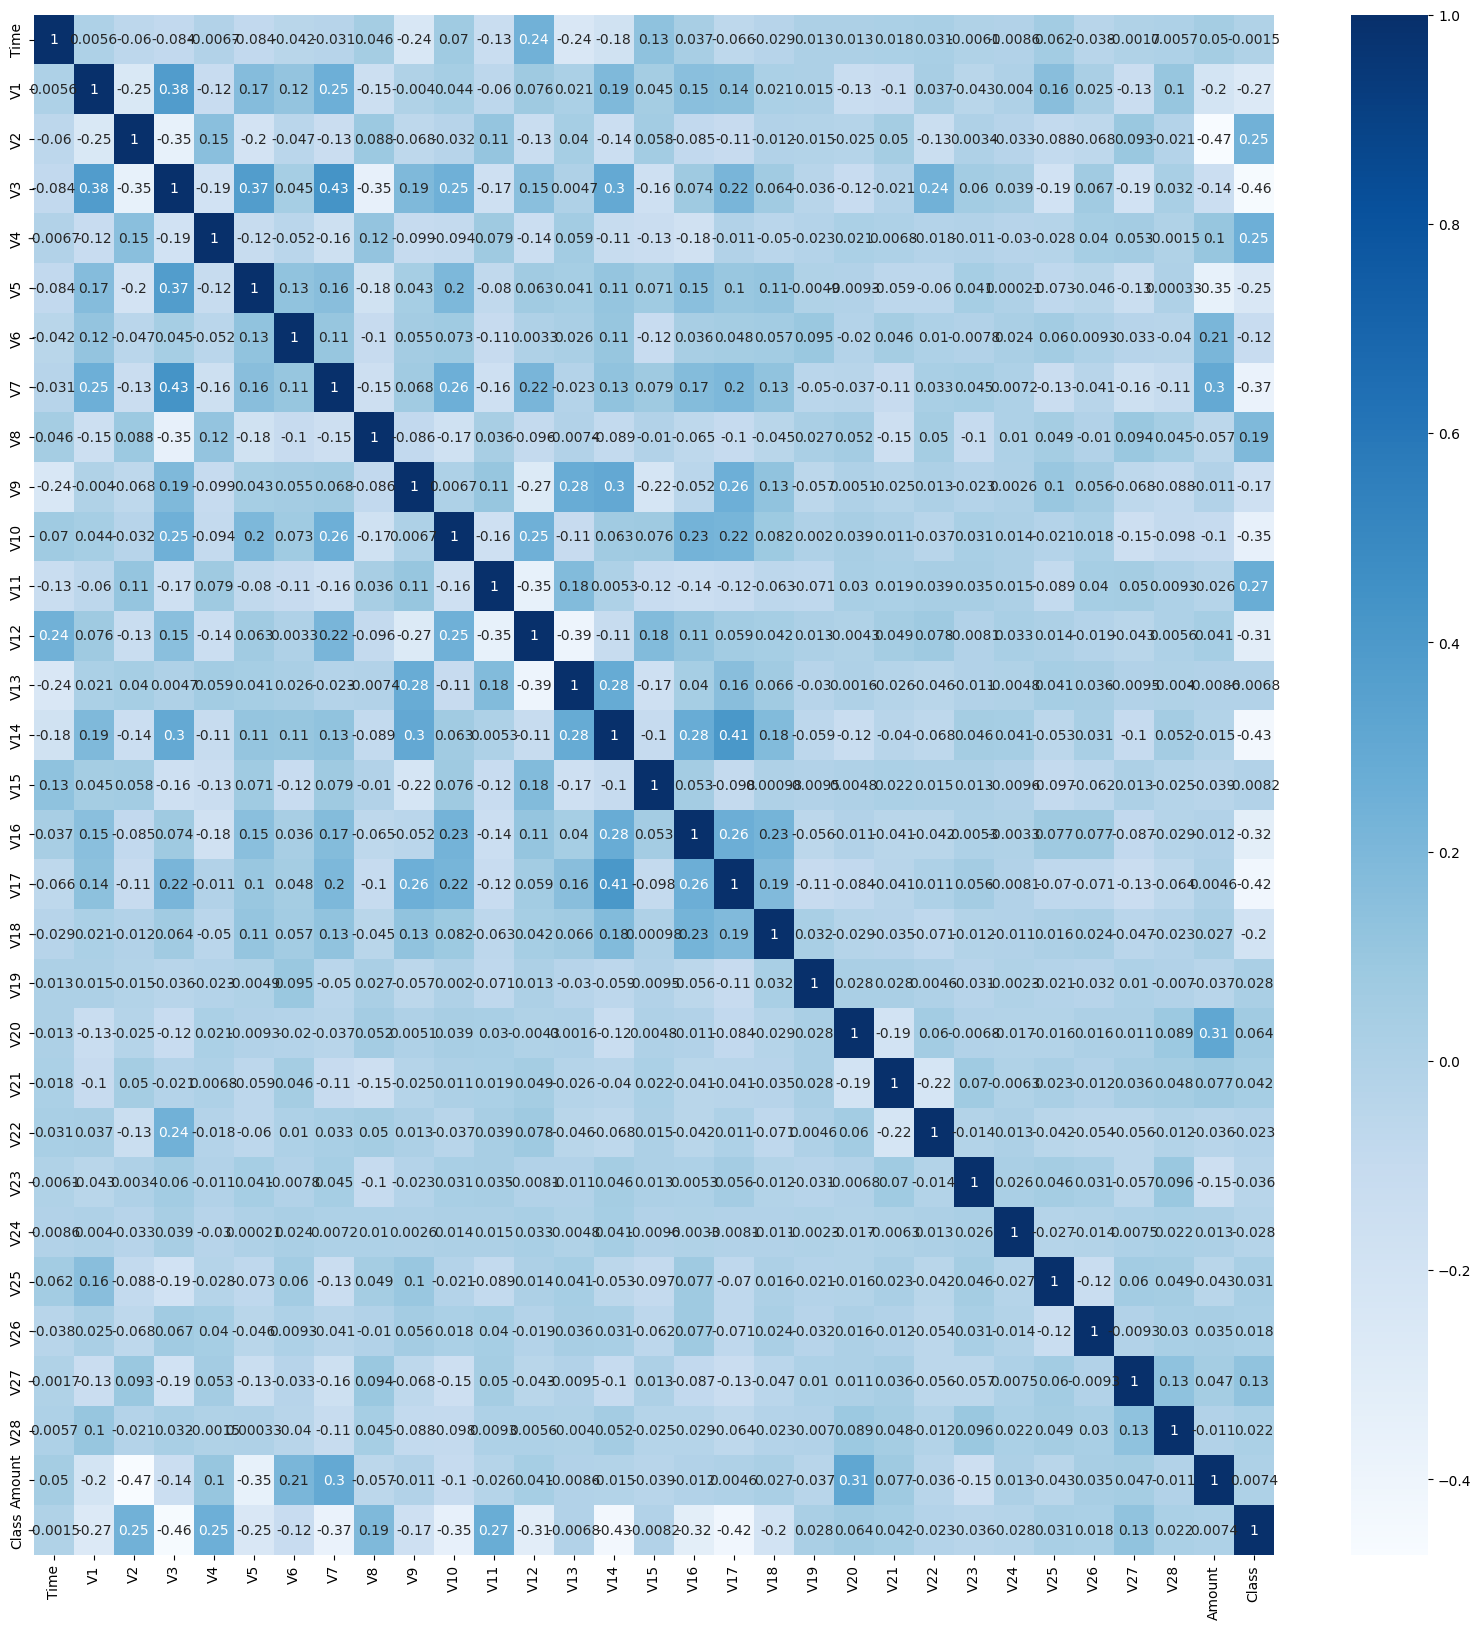

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.show()

Checking for null values

In [7]:
df.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22        True
V23        True
V24        True
V25        True
V26        True
V27        True
V28        True
Amount     True
Class      True
dtype: bool

Finding duplicates

In [8]:
n_duplicates = df.drop(labels=["Class"], axis=1).duplicated().sum()
print(f"Duplicates in the dataset: {n_duplicates}.")

Duplicates in the dataset: 88.


In [9]:
columns_to_consider = df.drop(labels=["Class"], axis=1).columns
df_X = df.drop_duplicates(subset=columns_to_consider)
df_X.shape

(23770, 31)

#### Plots

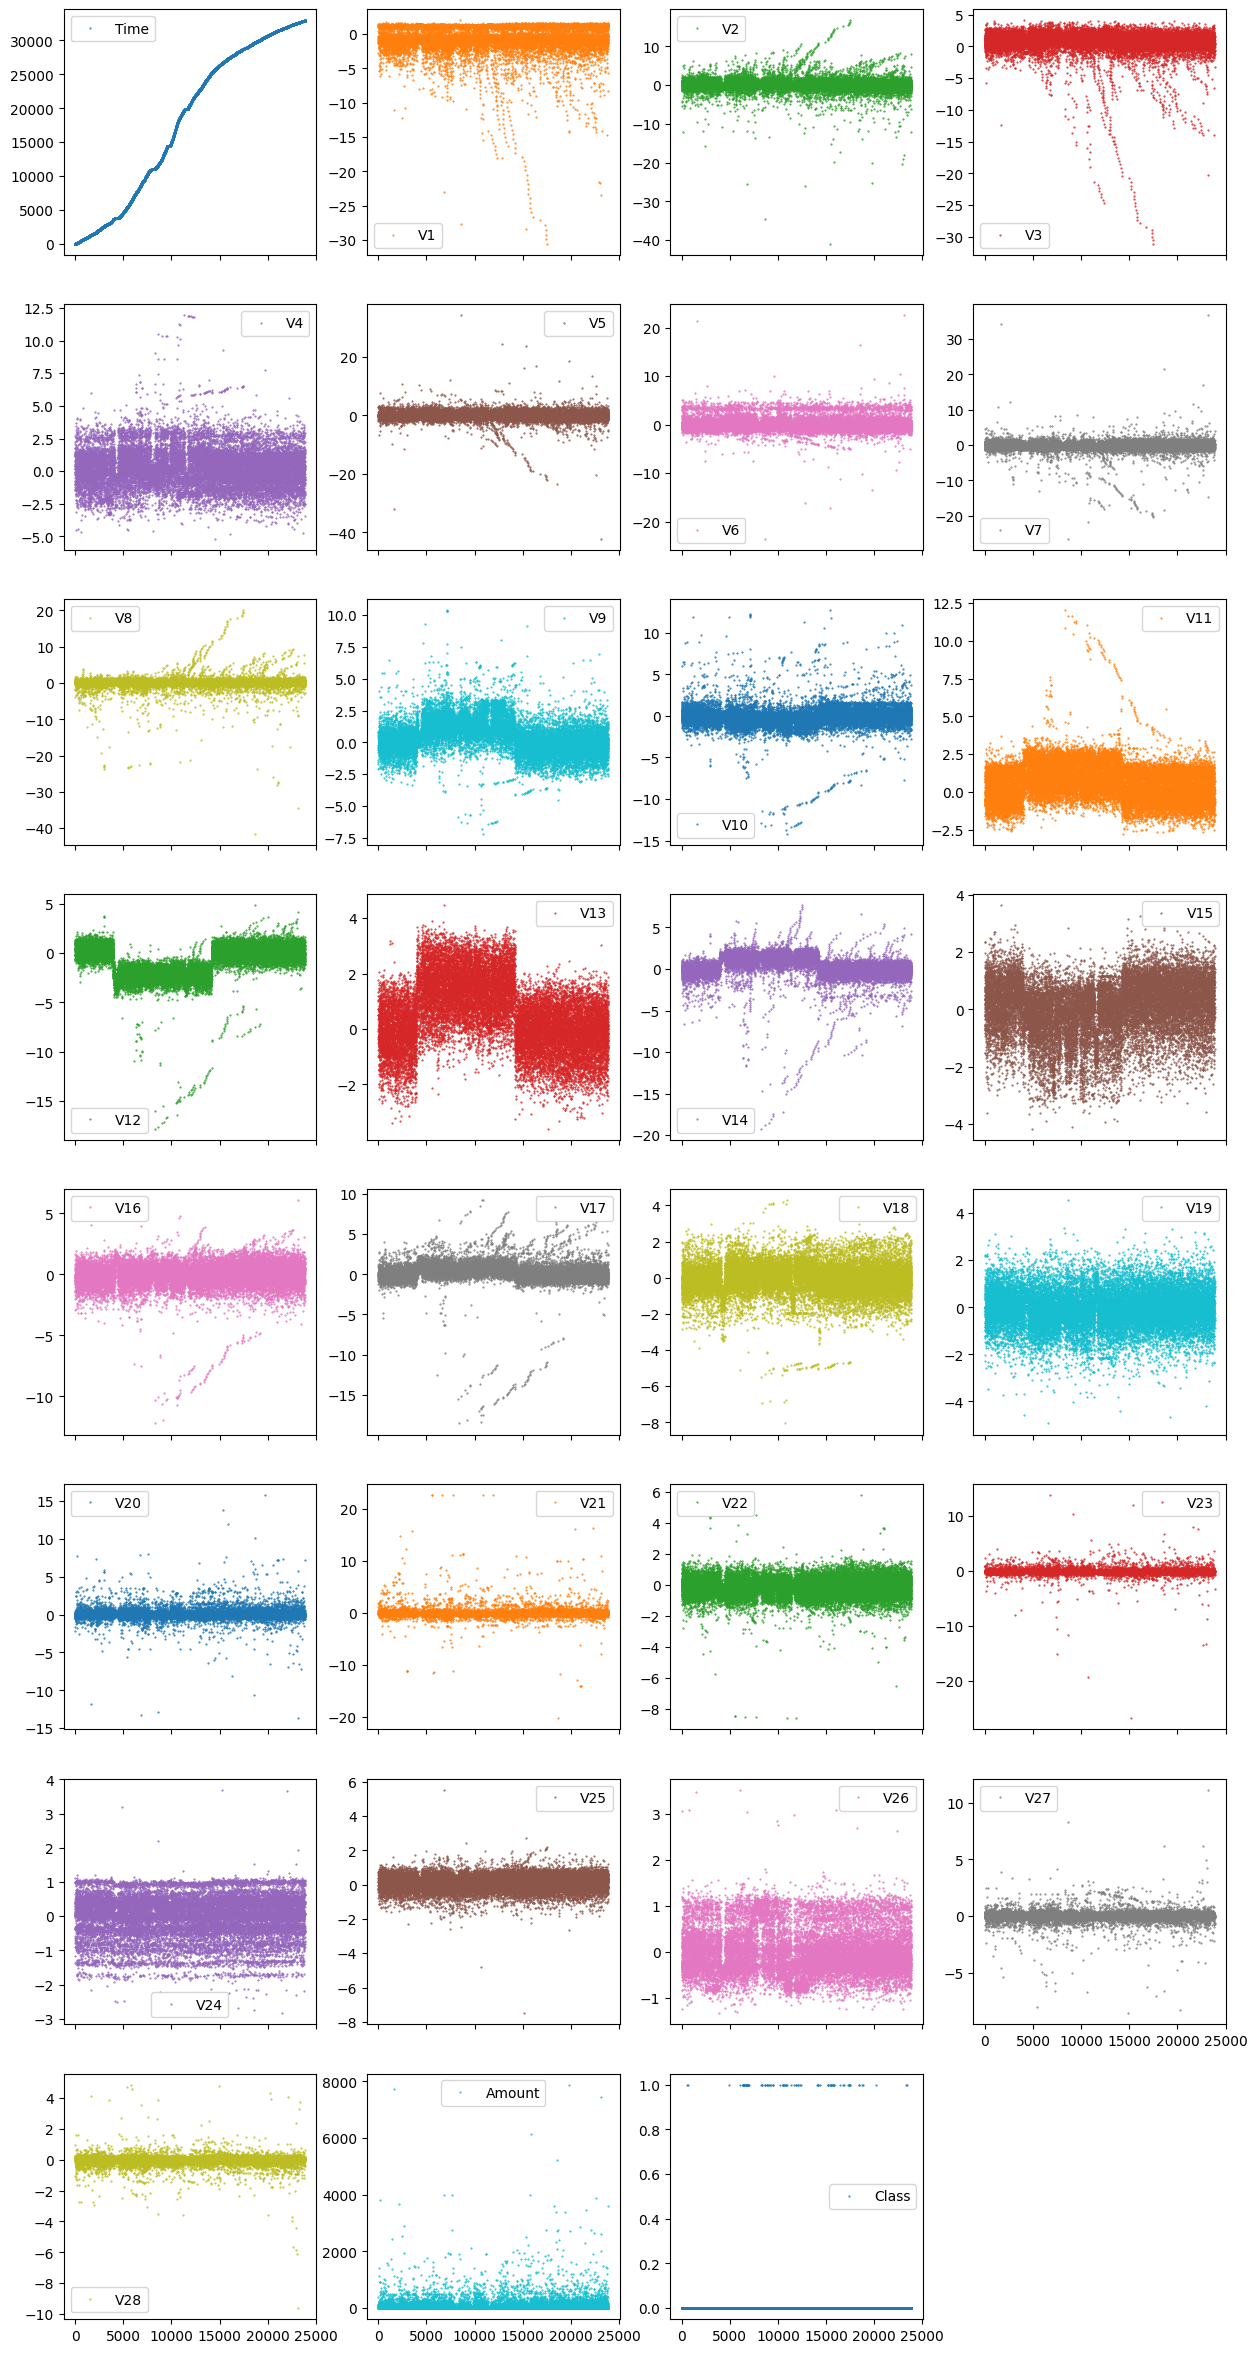

In [10]:
df_X.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(15, 30), markersize=1);

### Extra: Pandas profiling
`pip install pandas-profiling`

In [15]:
!pip install pandas_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 52.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=0baeb9661ca791c82be694966d0d557c35d17812274740cb23598c7837e7ee0b
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordc

In [16]:

from pandas_profiling import ProfileReport
report = ProfileReport(df)
report

<ipython-input-16-dd27d8a4dc7e>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

More plots.

In [ ]:
df_X.hist(bins=25, figsize=(15, 25), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

In [ ]:
most_frequent_entry

In [ ]:
df_X.mode().tail(1)

Class     0.996256
Amount    0.043753
V16       0.001515
V28       0.001515
V27       0.001515
dtype: float64

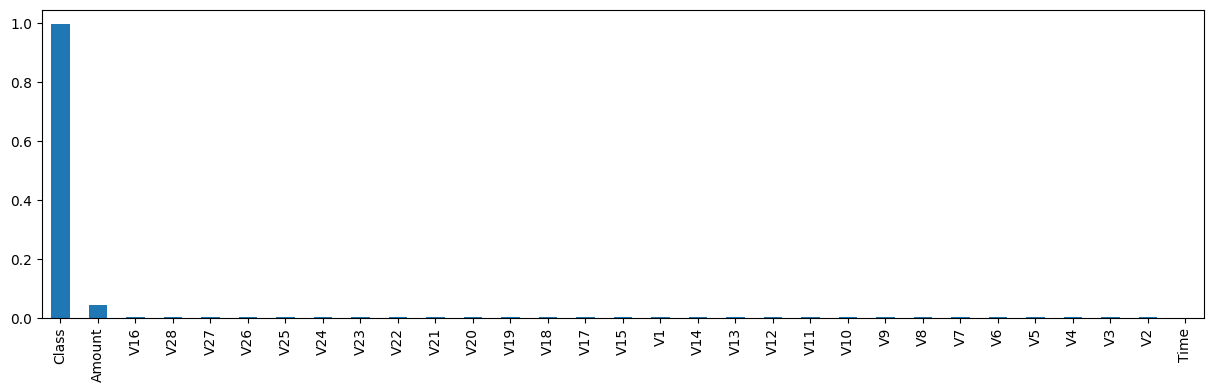

In [20]:
# Collects for each feature the most frequent entry
most_frequent_entry = df_X.mode().head(1)

# Checks for each entry if it contains the most frequent entry
df_freq = df_X.eq(most_frequent_entry.values, axis=1)

# Computes the mean of the 'is_most_frequent' occurrence
df_freq = df_freq.mean().sort_values(ascending=False)

# Show the 5 top features with the highest ratio of singular value content
display(df_freq.head())

# Visualize the 'df_freq' table
df_freq.plot.bar(figsize=(15, 4));

In [21]:
cols_continuous = df_X.select_dtypes(include="number").nunique() >= 25
df_continuous = df_X[cols_continuous[cols_continuous].index]
df_continuous.shape

(23770, 30)

In [22]:
sns.pairplot(df_continuous, height=1.5, plot_kws={"s": 2, "alpha": 0.2});

Error in callback <function _draw_all_if_interactive at 0x7f40a217e0e0> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f40a217d360> (for post_execute):


KeyboardInterrupt: ignored

Data Preprocessing

In [23]:
df.isnull().values.any()

True

In [28]:
scaler = StandardScaler()
scaler2 = StandardScaler()

In [29]:
#scaling time
scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

In [30]:
#scaling the amount column
scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [31]:
#concatenating newly created columns w original df
df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
244720,152460.0,-0.922361,1.974897,-1.005228,-0.254313,1.748616,-1.001922,1.506908,-0.052732,-1.413594,...,-0.698200,0.610498,1.079313,0.824043,-0.462562,-0.213418,0.76,0,-0.350191,1.213908
163185,115725.0,2.139464,-1.025881,-2.609551,-1.252257,1.847055,3.545134,-0.972267,0.788756,-0.372297,...,0.117501,0.748872,0.127652,0.747557,-0.024512,-0.072506,11.50,0,-0.307251,0.440345
259694,159232.0,-1.741521,-0.232338,-0.732431,-0.746274,1.301860,-0.313883,0.867620,-0.936593,-0.756488,...,-0.043059,0.102078,-0.331206,0.558420,-1.196102,0.422275,31.71,0,-0.226450,1.356512
234673,148067.0,-1.128576,-1.383844,0.810141,-1.576146,-0.304949,0.355923,-1.186694,0.892750,-0.400518,...,0.135161,0.170905,-0.051654,-0.388407,-0.113745,-0.234407,89.35,0,0.004000,1.121401
182142,125277.0,-0.608609,-0.825019,-2.417397,1.321635,0.861187,0.950105,0.681671,-2.990315,-1.200449,...,-0.799384,-0.275718,0.450420,-0.348779,0.085367,0.439855,628.60,0,2.159968,0.641490


In [32]:
#dropping old amount and time columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)

In [33]:
mask = np.random.rand(len(df)) < 0.9
train = df[mask]
test = df[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (256167, 31)
Test Shape: (28640, 31)


In [34]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [35]:
no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

There are 449 fraudulent transactions in the train data.


In [36]:
#randomly selecting 442 random non-fraudulent transactions
non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

In [37]:
selected = non_fraud.sample(no_of_frauds)
selected.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
151705,1.682665,-0.339699,-2.497707,0.996694,1.126654,-0.135525,0.940510,-0.296925,-0.459461,0.420662,...,0.325537,-0.270018,-0.093742,0.490655,-0.507445,-0.075305,-0.037900,0,0.498243,0.516154
79792,-1.183568,0.681420,0.940774,-0.180902,0.375268,-1.456396,0.240144,0.303926,-0.644375,-1.125760,...,-0.585833,0.054605,0.342436,-0.521451,-0.134910,-0.014833,0.002509,0,-0.348072,-0.686822
145966,-0.660584,0.492001,1.551254,-0.637832,-0.167466,-0.479988,0.463228,-0.112175,0.926631,-0.063369,...,0.970666,-0.228000,0.093984,-0.326578,0.576448,0.316199,0.086041,0,-0.233327,0.424362
148768,1.997285,0.496255,-2.281595,1.369771,1.041196,-0.665216,0.553936,-0.181947,-0.121798,-0.186642,...,0.210900,0.008412,0.578108,0.444902,-0.541028,-0.004307,-0.033333,0,-0.349231,0.475575
169214,2.281003,-1.218314,-1.977358,-1.417390,-0.768708,-1.641403,-0.185844,-0.588455,-1.729649,1.668794,...,0.378910,-0.038686,0.064616,0.349457,0.105134,-0.057982,-0.070102,0,-0.113584,0.694935


In [38]:
#concatenating both into a subsample data set with equal class distribution
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)

In [39]:
subsample = pd.concat([selected, fraud])
len(subsample)

898

In [ ]:
#shuffling our data set
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head(10)

Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

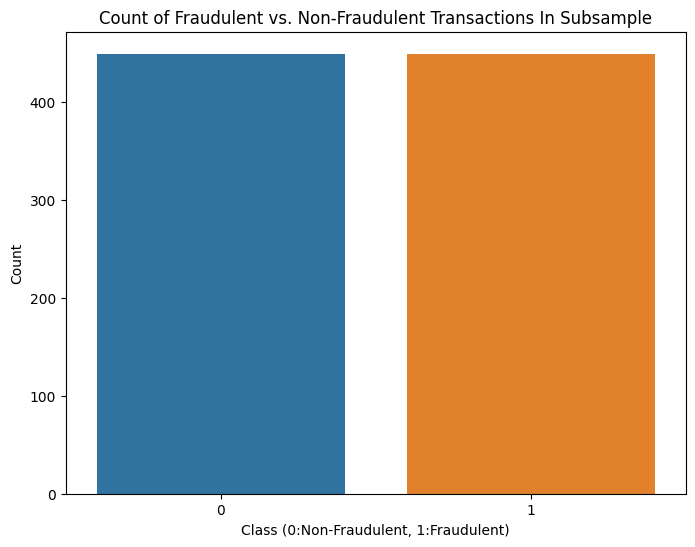

In [40]:
new_counts = subsample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [41]:
#taking a look at correlations once more
corr = subsample.corr()
corr = corr[['Class']]
corr

,Class
V1,-0.436114
V2,0.494644
V3,-0.564436
V4,0.714878
V5,-0.368675
V6,-0.433751
V7,-0.478301
V8,0.098021
V9,-0.564262
V10,-0.633745


In [42]:
#negative correlations smaller than -0.5
corr[corr.Class < -0.5]

,Class
V3,-0.564436
V9,-0.564262
V10,-0.633745
V12,-0.686505
V14,-0.751235
V16,-0.587617
V17,-0.558030


In [43]:
#positive correlations greater than 0.5
corr[corr.Class > 0.5]

,Class
V4,0.714878
V11,0.679860
Class,1.000000


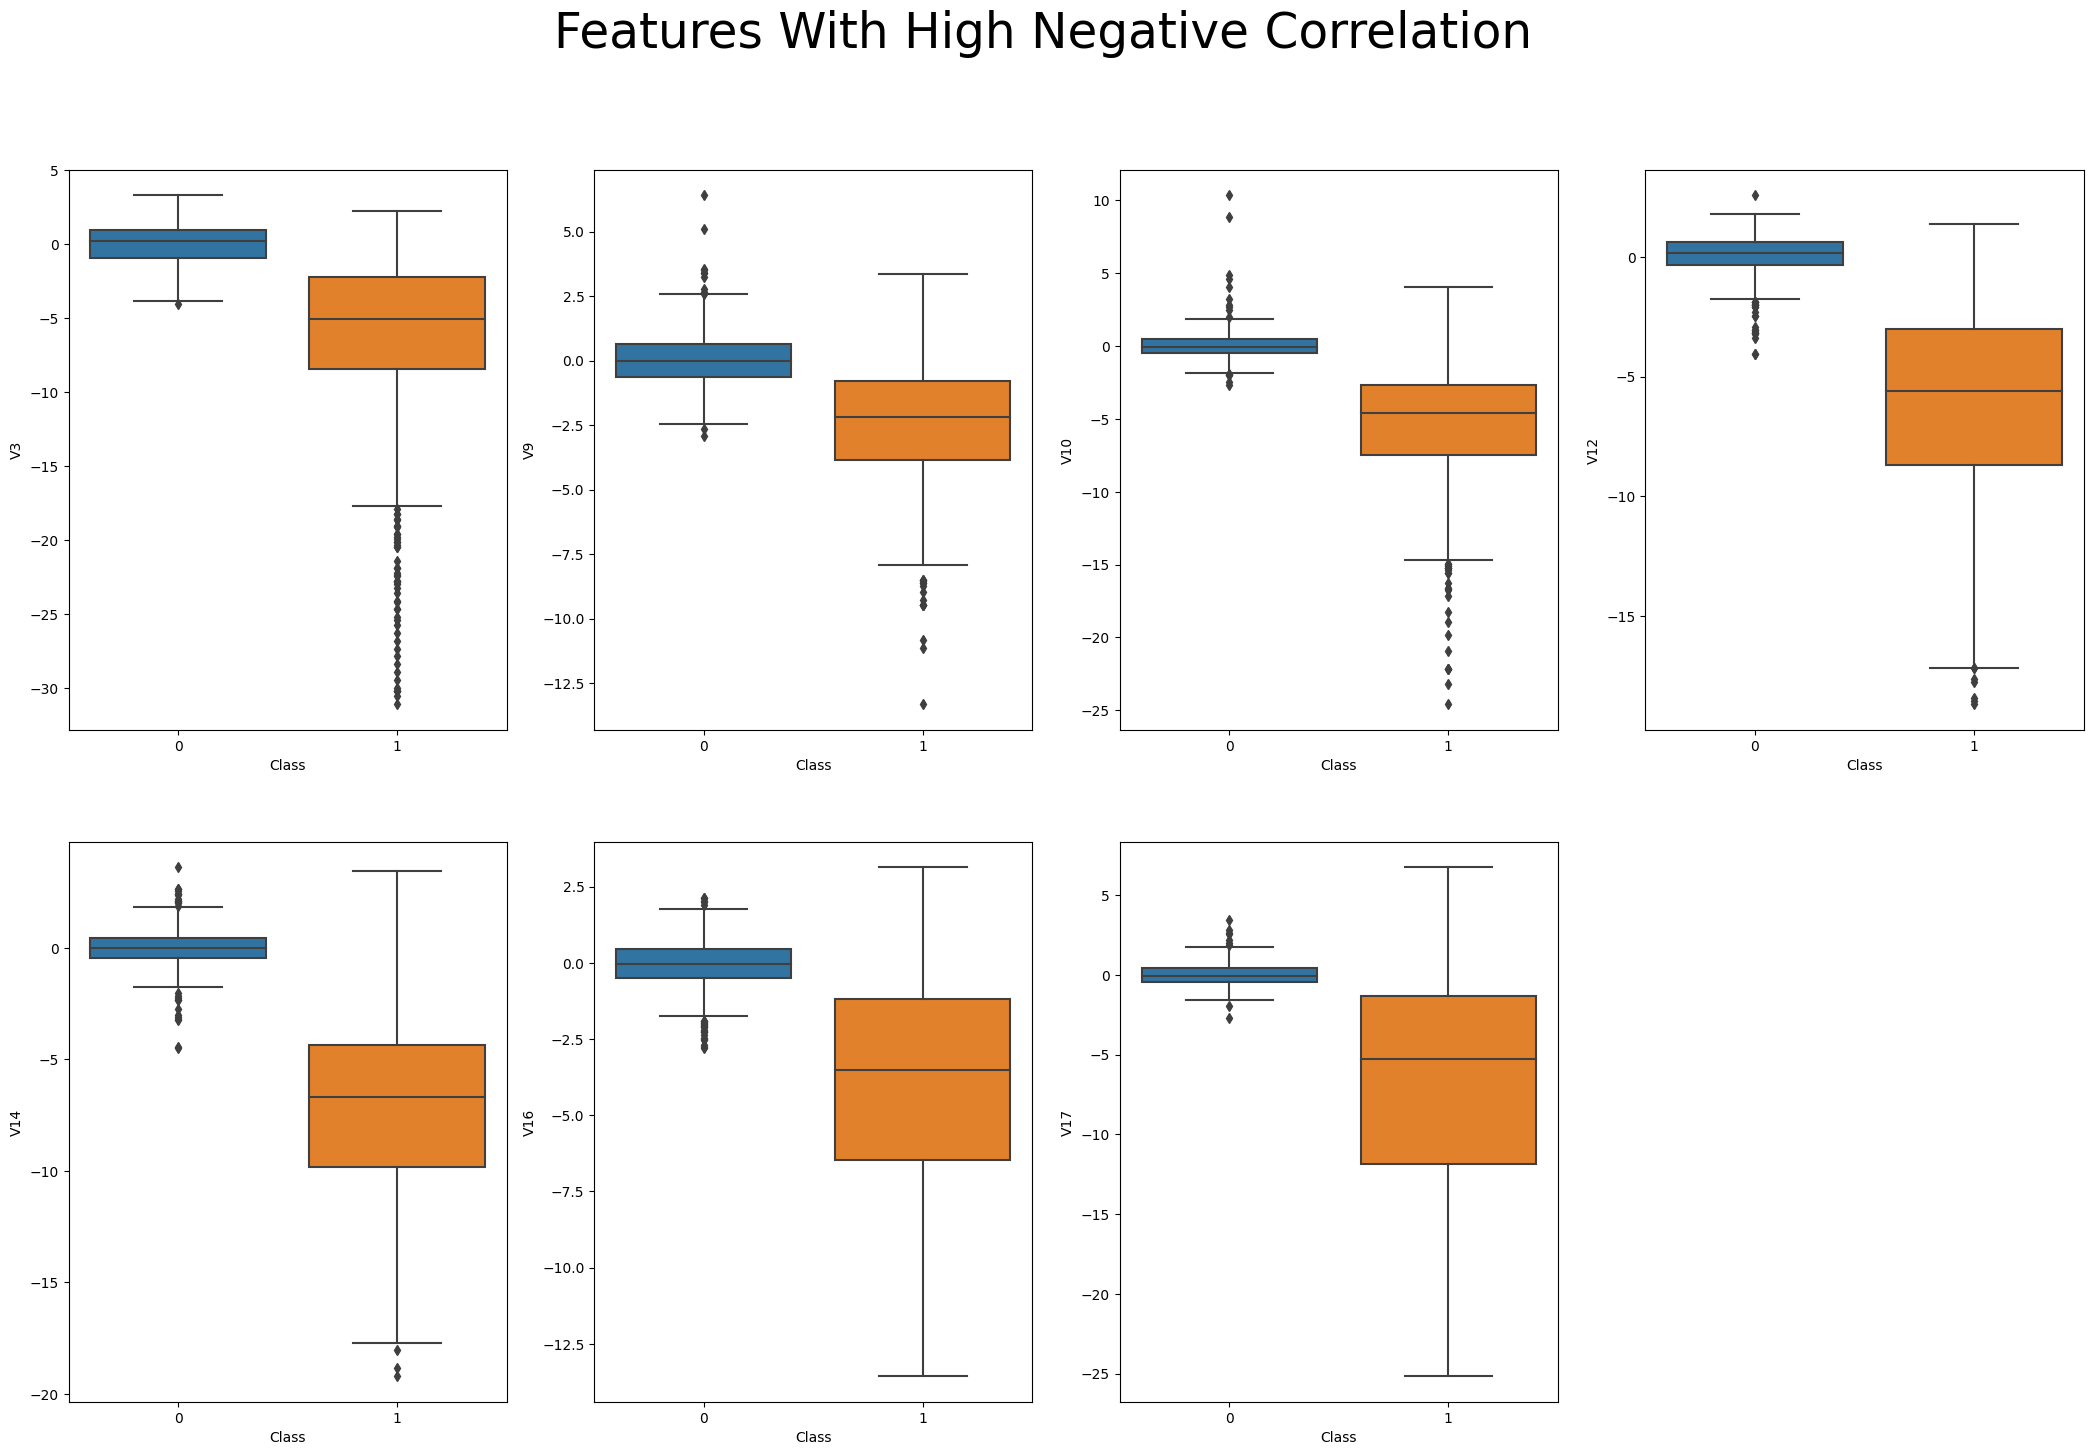

In [44]:
#visualizing the features w high negative correlation
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=subsample, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=subsample, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=subsample, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=subsample, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=subsample, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=subsample, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=subsample, ax=axes[1,2])
f.delaxes(axes[1,3])

<Axes: xlabel='Class', ylabel='V11'>

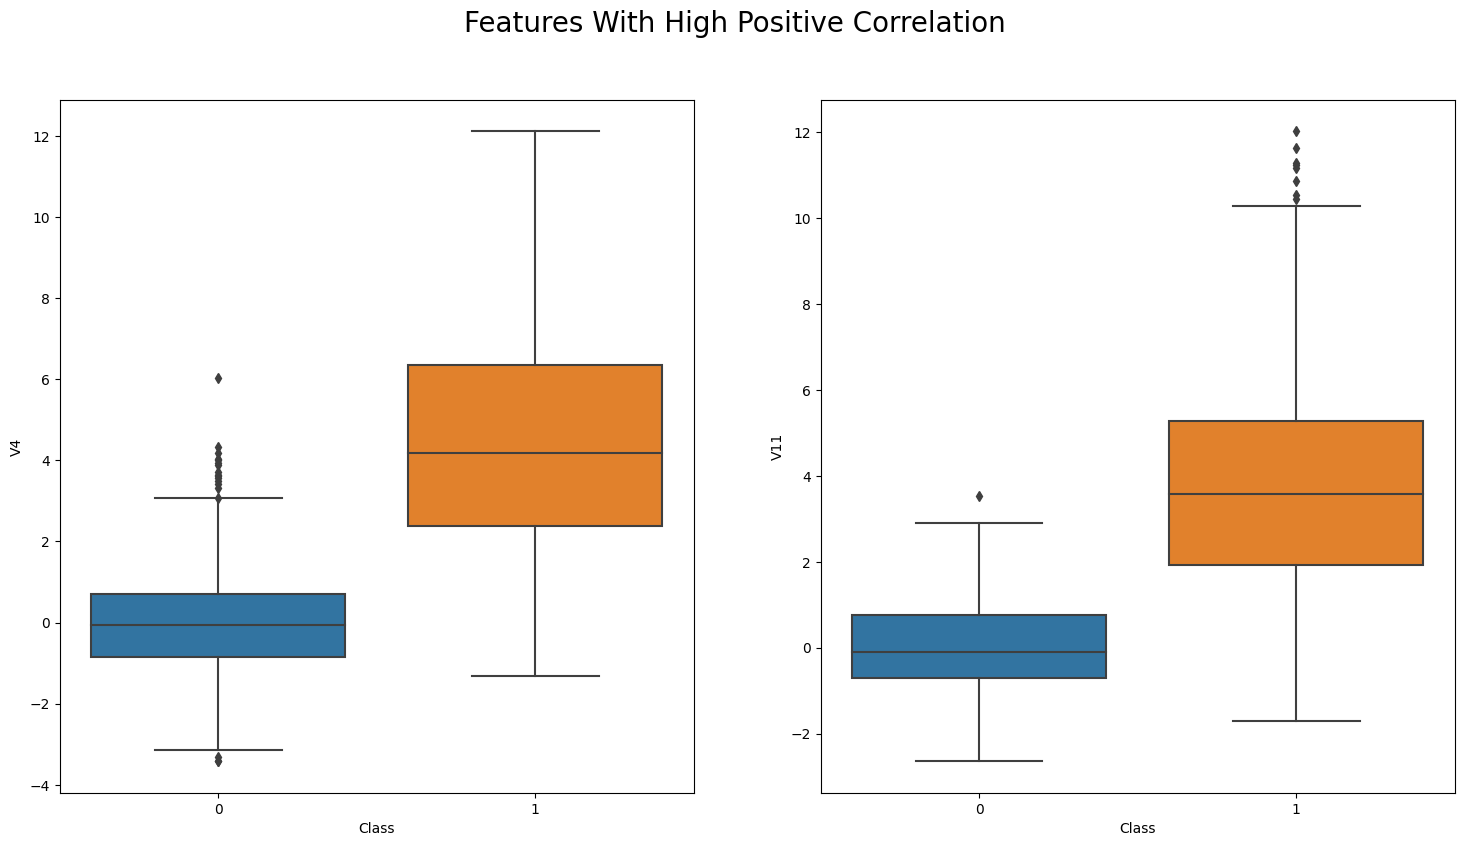

In [45]:
#visualizing the features w high positive correlation
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=subsample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=subsample, ax=axes[1])

In [46]:
#Only removing extreme outliers
Q1 = subsample.quantile(0.25)
Q3 = subsample.quantile(0.75)
IQR = Q3 - Q1

df2 = subsample[~((subsample < (Q1 - 2.5 * IQR)) |(subsample > (Q3 + 2.5 * IQR))).any(axis=1)]

In [47]:
len_after = len(df2)
len_before = len(subsample)
len_difference = len(subsample) - len(df2)

In [48]:
X = df2.drop('Class', axis=1)
y = df2['Class']

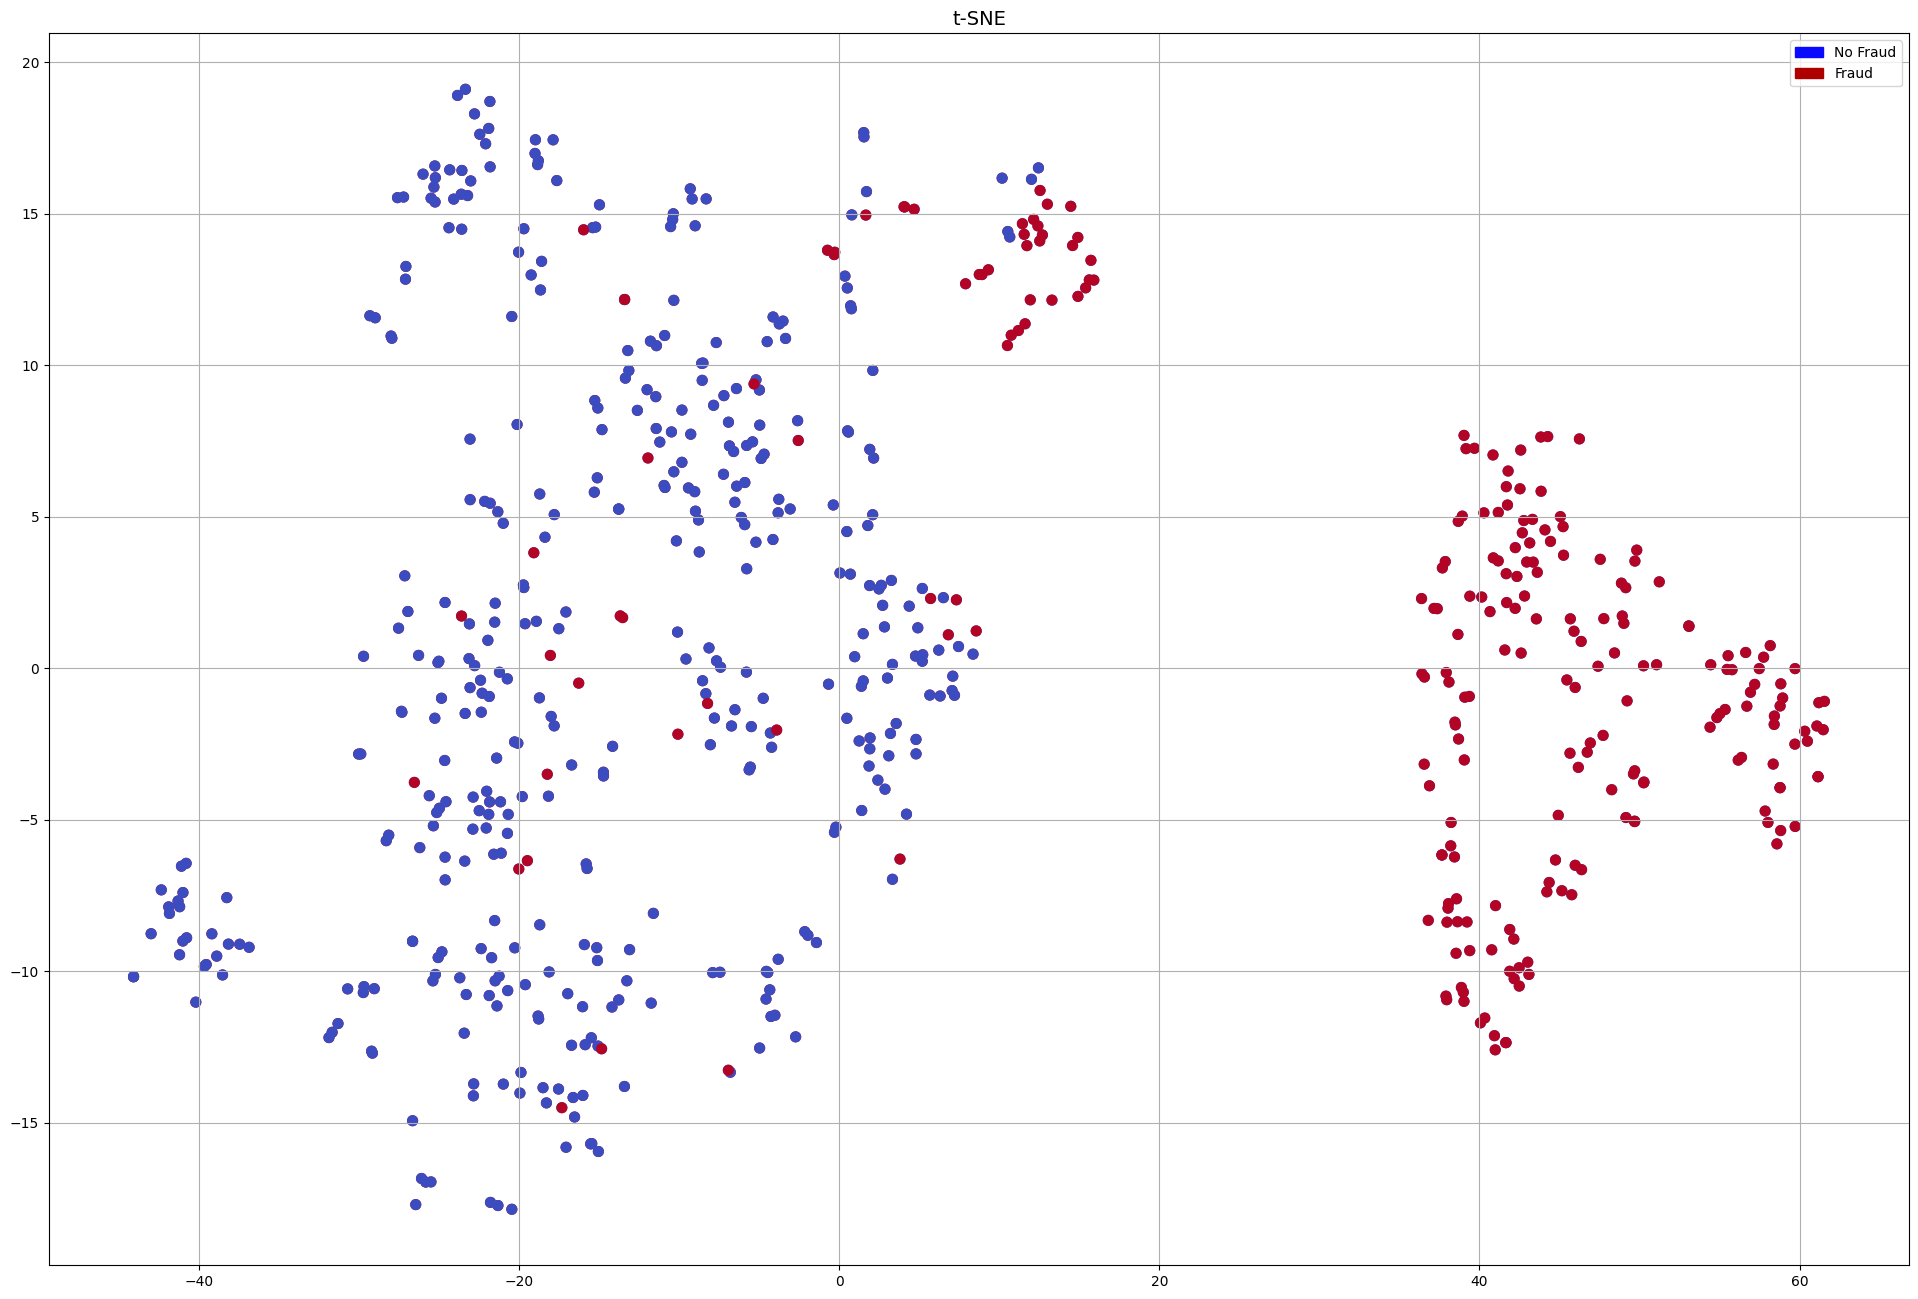

In [49]:
from sklearn.manifold import TSNE
#t-SNE
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
# t-SNE scatter plot
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(24,16))


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_validation.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_validation.shape)

X_shapes:
 X_train: X_validation:
 (509, 30) (128, 30) 

Y_shapes:
 Y_train: Y_validation:
 (509,) (128,)
